In [1]:
import pandas as pd
import numpy as np

In [2]:
dh=pd.read_csv("Customertravel.csv")
dh

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0
...,...,...,...,...,...,...,...
949,31,Yes,Low Income,1,No,No,0
950,30,No,Middle Income,5,No,Yes,0
951,37,No,Middle Income,4,No,No,0
952,30,No,Low Income,1,Yes,Yes,0


In [3]:
dh.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


In [4]:
dh.describe

<bound method NDFrame.describe of      Age FrequentFlyer AnnualIncomeClass  ServicesOpted  \
0     34            No     Middle Income              6   
1     34           Yes        Low Income              5   
2     37            No     Middle Income              3   
3     30            No     Middle Income              2   
4     30            No        Low Income              1   
..   ...           ...               ...            ...   
949   31           Yes        Low Income              1   
950   30            No     Middle Income              5   
951   37            No     Middle Income              4   
952   30            No        Low Income              1   
953   31           Yes       High Income              1   

    AccountSyncedToSocialMedia BookedHotelOrNot  Target  
0                           No              Yes       0  
1                          Yes               No       1  
2                          Yes               No       0  
3                        

In [5]:
dh.shape

(954, 7)

In [6]:
dh.isnull().sum()

Age                           0
FrequentFlyer                 0
AnnualIncomeClass             0
ServicesOpted                 0
AccountSyncedToSocialMedia    0
BookedHotelOrNot              0
Target                        0
dtype: int64

In [7]:
dh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         954 non-null    int64 
 1   FrequentFlyer               954 non-null    object
 2   AnnualIncomeClass           954 non-null    object
 3   ServicesOpted               954 non-null    int64 
 4   AccountSyncedToSocialMedia  954 non-null    object
 5   BookedHotelOrNot            954 non-null    object
 6   Target                      954 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 52.3+ KB


In [8]:
dh.columns

Index(['Age', 'FrequentFlyer', 'AnnualIncomeClass', 'ServicesOpted',
       'AccountSyncedToSocialMedia', 'BookedHotelOrNot', 'Target'],
      dtype='object')

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le = LabelEncoder()
dh['FrequentFlyer']=le.fit_transform(dh['FrequentFlyer'])
dh['AnnualIncomeClass']=le.fit_transform(dh['AnnualIncomeClass'])
dh['AccountSyncedToSocialMedia']=le.fit_transform(dh['AccountSyncedToSocialMedia'])
dh['BookedHotelOrNot']=le.fit_transform(dh['BookedHotelOrNot'])

In [11]:
dh

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,0,2,6,0,1,0
1,34,2,1,5,1,0,1
2,37,0,2,3,1,0,0
3,30,0,2,2,0,0,0
4,30,0,1,1,0,0,0
...,...,...,...,...,...,...,...
949,31,2,1,1,0,0,0
950,30,0,2,5,0,1,0
951,37,0,2,4,0,0,0
952,30,0,1,1,1,1,0


In [12]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score
import sklearn.metrics as metrics

{'whiskers': [<matplotlib.lines.Line2D at 0x1e48dfae390>,
 'caps': [<matplotlib.lines.Line2D at 0x1e48dfae9c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e48dfae150>,
 'medians': [<matplotlib.lines.Line2D at 0x1e48dfaeff0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1e48dfaf320>,
 'means': []}

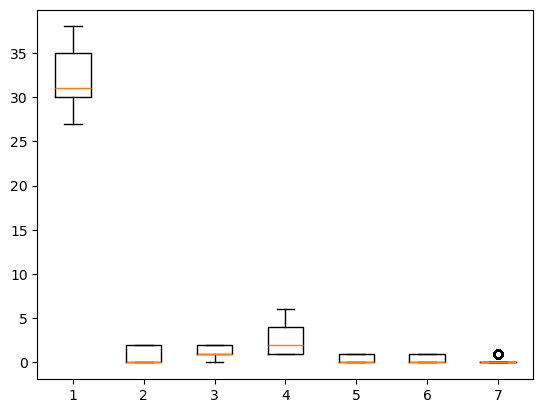

In [13]:
plt.boxplot(dh)

In [14]:
dh.corr()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
Age,1.000000,0.034671,0.053149,-0.012422,-0.016367,0.024281,-0.131534
FrequentFlyer,0.034671,1.000000,-0.709380,-0.164981,-0.084590,-0.189947,0.418672
AnnualIncomeClass,0.053149,-0.709380,1.000000,0.236364,0.034744,0.250833,-0.418092
ServicesOpted,-0.012422,-0.164981,0.236364,1.000000,-0.148655,0.155886,0.038646
AccountSyncedToSocialMedia,-0.016367,-0.084590,0.034744,-0.148655,1.000000,-0.100104,0.073831
BookedHotelOrNot,0.024281,-0.189947,0.250833,0.155886,-0.100104,1.000000,-0.206055
Target,-0.131534,0.418672,-0.418092,0.038646,0.073831,-0.206055,1.000000


In [15]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as snb
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

In [16]:
x=dh.drop('Target',axis=1)
y=dh['Target']

In [17]:
X_train,X_test,y_train,y_test=train_test_split(dh.drop('Target',axis=1),dh['Target'],
                                               test_size=0.2,
                                               random_state=5)

In [18]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
X_train.shape

(763, 6)

In [20]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [21]:
lr.coef_

array([-0.05754942,  0.10165075, -0.11331759,  0.07351223,  0.04863826,
       -0.04549594])

In [22]:
lr.intercept_

0.22804718217562256

In [23]:
y_pred=lr.predict(X_test)

In [24]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
print(mse)
print(mae)

0.145585953370565
0.29682001118616813


In [25]:
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test,y_pred)
print(rmse)
print(r2)

0.3815572740370245
0.2466494801543856


In [26]:
import sklearn.metrics as metrics
from sklearn.linear_model import Ridge,Lasso
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

In [27]:
rg=Ridge(alpha=4)
rg.fit(X_train,y_train)

Ridge(alpha=4)

In [28]:
rg_pred=rg.predict(X_test)

In [29]:
r2 = metrics.r2_score(y_test,rg_pred)
r2

0.24673116714574939

In [30]:
# logistic r
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()

In [32]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [33]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [34]:
y_pred = logreg.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, logreg.predict_proba(X_test_scaled)[:, 1]))


Accuracy: 0.7801047120418848
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       141
           1       0.62      0.40      0.49        50

    accuracy                           0.78       191
   macro avg       0.72      0.66      0.67       191
weighted avg       0.76      0.78      0.76       191

ROC-AUC: 0.8261702127659575


In [35]:
from sklearn.metrics import mean_absolute_error, r2_score

In [36]:
logreg_pred = logreg.predict(X_test_scaled)
print("R2-score: ", f"{(r2_score(y_test, logreg_pred) * 100):0.1f}", "%")

R2-score:  -13.8 %


In [37]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

In [38]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [39]:
# Evaluate model
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))



Accuracy: 0.8324607329842932
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       141
           1       0.70      0.64      0.67        50

    accuracy                           0.83       191
   macro avg       0.79      0.77      0.78       191
weighted avg       0.83      0.83      0.83       191

ROC-AUC: 0.9358156028368795


In [40]:
y_pred = rf.predict(X_test)
print("R2-score: ", f"{(r2_score(y_test, y_pred) * 100):0.1f}", "%")

R2-score:  13.3 %


In [41]:
# decision tree
from sklearn.tree import DecisionTreeClassifier

In [42]:
dt=DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [43]:
y_pred = dt.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1]))


Accuracy: 0.8586387434554974
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       141
           1       0.78      0.64      0.70        50

    accuracy                           0.86       191
   macro avg       0.83      0.79      0.81       191
weighted avg       0.85      0.86      0.85       191

ROC-AUC: 0.8774468085106383


In [44]:
y_pred = dt.predict(X_test)
print("R2-score: ", f"{(r2_score(y_test, y_pred) * 100):0.1f}", "%")

R2-score:  26.9 %


In [45]:
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score



In [46]:
svm = svm.SVC(kernel='rbf', C=1, random_state=42, probability=True)


In [47]:
svm.fit(X_train, y_train)

SVC(C=1, probability=True, random_state=42)

In [48]:
y_pred = svm.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, svm.predict_proba(X_test)[:, 1]))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7853403141361257
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       141
           1       0.64      0.42      0.51        50

    accuracy                           0.79       191
   macro avg       0.73      0.67      0.68       191
weighted avg       0.77      0.79      0.77       191

ROC-AUC: 0.8699999999999999
Confusion Matrix:
 [[129  12]
 [ 29  21]]


In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
knn = KNeighborsClassifier(n_neighbors=5)

In [51]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [52]:
y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1]))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8272251308900523
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       141
           1       0.73      0.54      0.62        50

    accuracy                           0.83       191
   macro avg       0.79      0.73      0.75       191
weighted avg       0.82      0.83      0.82       191

ROC-AUC: 0.8904964539007092
Confusion Matrix:
 [[131  10]
 [ 23  27]]


In [53]:
y_pred = knn.predict(X_test)
print("R2-score: ", f"{(r2_score(y_test, y_pred) * 100):0.1f}", "%")

R2-score:  10.6 %


In [54]:
from sklearn.ensemble import GradientBoostingClassifier

In [55]:
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)


In [56]:
gbc.fit(X_train, y_train)


GradientBoostingClassifier()

In [57]:
y_pred = gbc.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, gbc.predict_proba(X_test)[:, 1]))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8691099476439791
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       141
           1       0.78      0.70      0.74        50

    accuracy                           0.87       191
   macro avg       0.84      0.81      0.82       191
weighted avg       0.87      0.87      0.87       191

ROC-AUC: 0.949290780141844
Confusion Matrix:
 [[131  10]
 [ 15  35]]


In [58]:
y_pred = gbc.predict(X_test)
print("R2-score: ", f"{(r2_score(y_test, y_pred) * 100):0.1f}", "%")

R2-score:  32.3 %


In [59]:
# grid search
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [60]:
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}



In [61]:
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1_macro', refit=True)


In [63]:
grid_search.fit(X_train_scaled, y_train)

KeyboardInterrupt: 

In [65]:
# Check if grid search was successful
if hasattr(grid_search, 'best_params_'):
    print("Best Parameters:", grid_search.best_params_)
    print("Best Score:", grid_search.best_score_)
else:
    print("Grid search failed.")

Grid search failed.


In [67]:
# Evaluate best model on test set
if hasattr(grid_search, 'best_estimator_'):
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_scaled)
    print("Test Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


In [69]:
y_pred =grid_search.predict(X_test)
print("R2-score: ", f"{(r2_score(y_test, y_pred) * 100):0.1f}", "%")

NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [71]:
import streamlit as st
import pickle

In [127]:
# Create a dictionary to store model and scaler
churn_model_dict = {
    'model': rf,
    'scaler': scaler
}

# Save dictionary to pickle file
with open('churn_prediction_model.pkl', 'wb') as f:
    pickle.dump(churn_model_dict, f)


with open('churn_prediction_model.pkl', 'rb') as f:
    loaded_churn_model_dict = pickle.load(f)


#**Verify the Loaded Model:**


print(loaded_churn_model_dict.keys())  # Should print the dictionary keys
print(loaded_churn_model_dict['model'])  # Should print the model object
print(loaded_churn_model_dict['scaler'])  # Should print the scaler object




dict_keys(['model', 'scaler'])
RandomForestClassifier(random_state=42)
StandardScaler()


In [103]:
load_model.score(X_test,y_test)

0.8324607329842932

In [129]:
# Create a new dataset for prediction
new_data = pd.DataFrame({
    'Age': [30],
    'FrequentFlyer': [1],
    'AnnualIncomeClass': [2],
    'ServicesOpted': [3],
    'AccountSyncedToSocialMedia': [1],
    'BookedHotelOrNot': [1]
})

# Scale new data using loaded scaler
new_data_scaled = loaded_churn_model_dict['scaler'].transform(new_data)

# Make predictions using loaded model
prediction = loaded_churn_model_dict['model'].predict(new_data_scaled)
print(prediction)  # Should print the predicted churn probability




[0]


In [135]:
# *Using the Loaded Model for Predictions:*


# Create a new dataset for prediction
new_data = pd.DataFrame({
    'Age': [27],
    'FrequentFlyer': [2],
    'AnnualIncomeClass': [0],
    'ServicesOpted': [1],
    'AccountSyncedToSocialMedia': [0],
    'BookedHotelOrNot': [1]
})

# Scale new data using loaded scaler
new_data_scaled =loaded_churn_model_dict ['scaler'].transform(new_data)

# Make predictions using loaded model
prediction =loaded_churn_model_dict['model'].predict(new_data_scaled)
print(prediction)  # Should print the predicted churn probability



[1]


In [131]:
# Create a new dataset for prediction
new_data = pd.DataFrame({
    'Age': [37],
    'FrequentFlyer': [2],
    'AnnualIncomeClass': [1],
    'ServicesOpted': [6],
    'AccountSyncedToSocialMedia': [0],
    'BookedHotelOrNot': [1]
})

# Scale new data using loaded scaler
new_data_scaled = loaded_churn_model_dict['scaler'].transform(new_data)

# Make predictions using loaded model
prediction = loaded_churn_model_dict['model'].predict(new_data_scaled)
print(prediction)  # Should print the predicted churn probability




[0]
